#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

#### Analyses of given DataSet

In [2]:
dataFrame_CLS = pd.read_csv('bodyPerformance.csv')
dataFrame_REG = pd.read_csv('measures_v2.csv')
display(dataFrame_CLS)
display(dataFrame_REG)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [3]:
dataFrame_CLS.info()
dataFrame_CLS.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [4]:
dataFrame_REG.info()
dataFrame_REG.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [5]:
label_encoder = LabelEncoder()
dataFrame_CLS_encoded = dataFrame_CLS.copy()
dataFrame_CLS_encoded[['gender', 'class']] = dataFrame_CLS[['gender', 'class']].apply(lambda col: label_encoder.fit_transform(col))

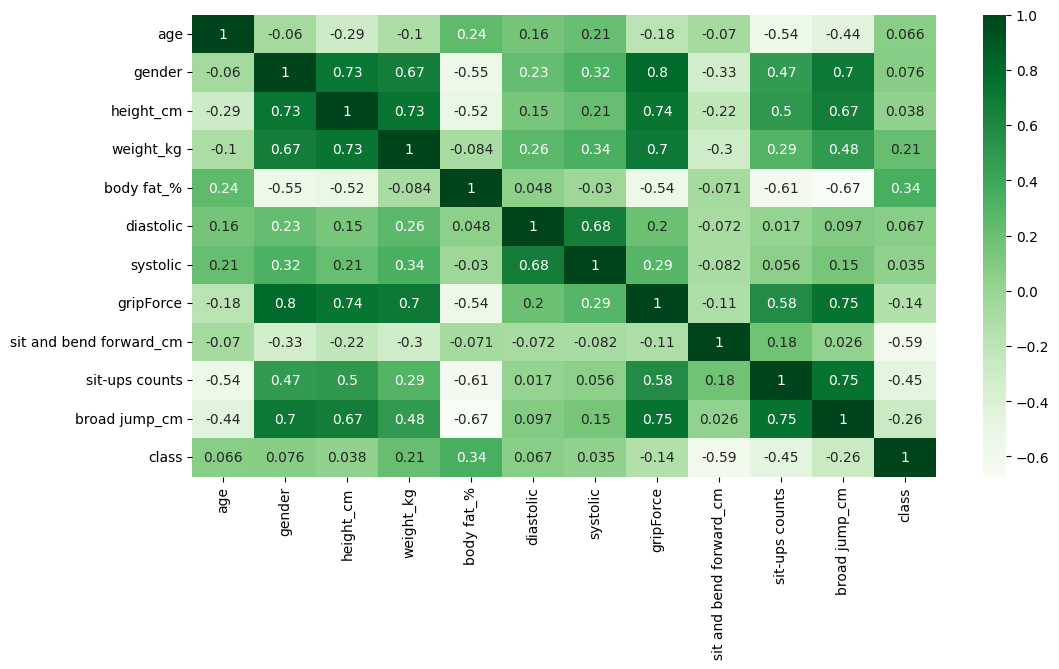

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataFrame_CLS_encoded.corr(), annot=True, cmap='Greens')
plt.show()

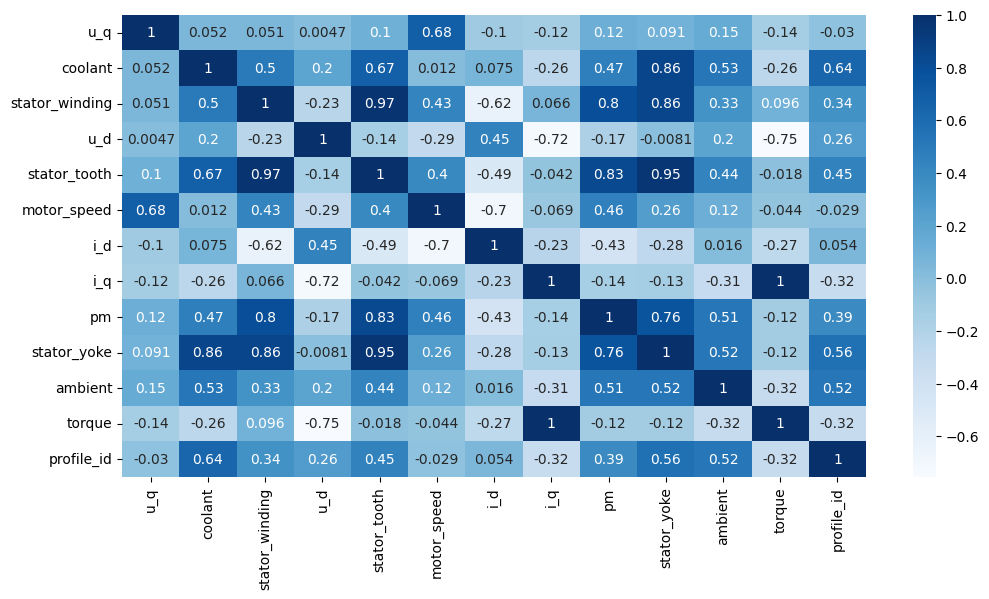

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataFrame_REG.corr(), annot=True, cmap='Blues')
plt.show()

#### Line Plots

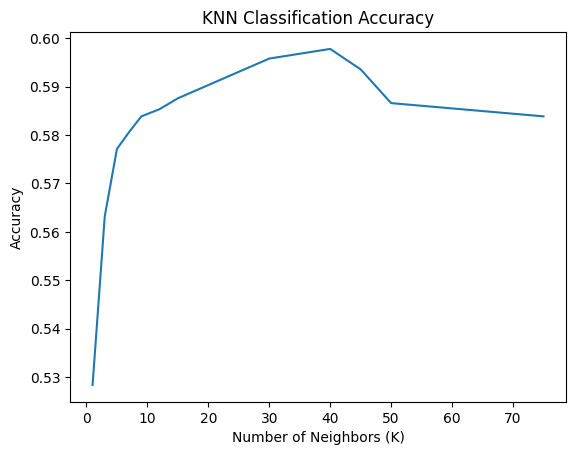

In [8]:
columns_to_drop = ['age', 'gender', 'height_cm', 'diastolic', 'systolic', 'class']
X_cls = dataFrame_CLS_encoded.drop(columns=columns_to_drop, axis=1)
y_cls = dataFrame_CLS_encoded['class']

# Split data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# KNN Classification Line Plot
neighbors = [1, 3, 5, 7, 9, 12, 15, 30, 40, 45, 50, 75]
accuracy_list = []

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_cls, y_train_cls)
    y_pred_cls = knn_classifier.predict(X_test_cls)
    accuracy = accuracy_score(y_test_cls, y_pred_cls)
    accuracy_list.append(accuracy)

plt.plot(neighbors, accuracy_list)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Classification Accuracy')
plt.show()

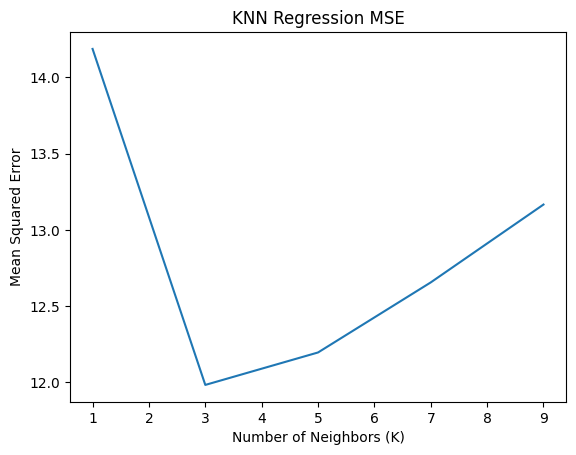

In [9]:
X_reg = dataFrame_REG.drop('pm', axis=1)
y_reg = dataFrame_REG['pm']

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# KNN Regression Line Plot
neighbors = [1, 3, 5, 7, 9]
mse_list = []

for k in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_regressor.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_list.append(mse)

plt.plot(neighbors, mse_list)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression MSE')
plt.show()

In [10]:
# Create a list of max depths and max features to be used in the heatmap
max_depths = range(1, 10)
max_features_list = [None, 'sqrt', 'log2', 0.5]

# Create a dictionary to store accuracy values
accuracy_dict_gini = {}
accuracy_dict_entropy = {}

# Create dictionaries to store MSE values for different criteria
mse_dict_friedman_mse = {}
mse_dict_poisson = {}

In [11]:
# Iterate over max depths and max features for gini criterion
for max_depth in max_depths:
    for max_features in max_features_list:
        dt_classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, max_features=max_features, random_state=42)
        dt_classifier_gini.fit(X_train_cls, y_train_cls)
        y_pred_gini = dt_classifier_gini.predict(X_test_cls)
        accuracy_gini = accuracy_score(y_test_cls, y_pred_gini)
        accuracy_dict_gini[(max_depth, max_features)] = accuracy_gini

In [12]:
# Iterate over max depths and max features for entropy criterion
for max_depth in max_depths:
    for max_features in max_features_list:
        dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_features=max_features, random_state=42)
        dt_classifier_entropy.fit(X_train_cls, y_train_cls)
        y_pred_entropy = dt_classifier_entropy.predict(X_test_cls)
        accuracy_entropy = accuracy_score(y_test_cls, y_pred_entropy)
        accuracy_dict_entropy[(max_depth, max_features)] = accuracy_entropy

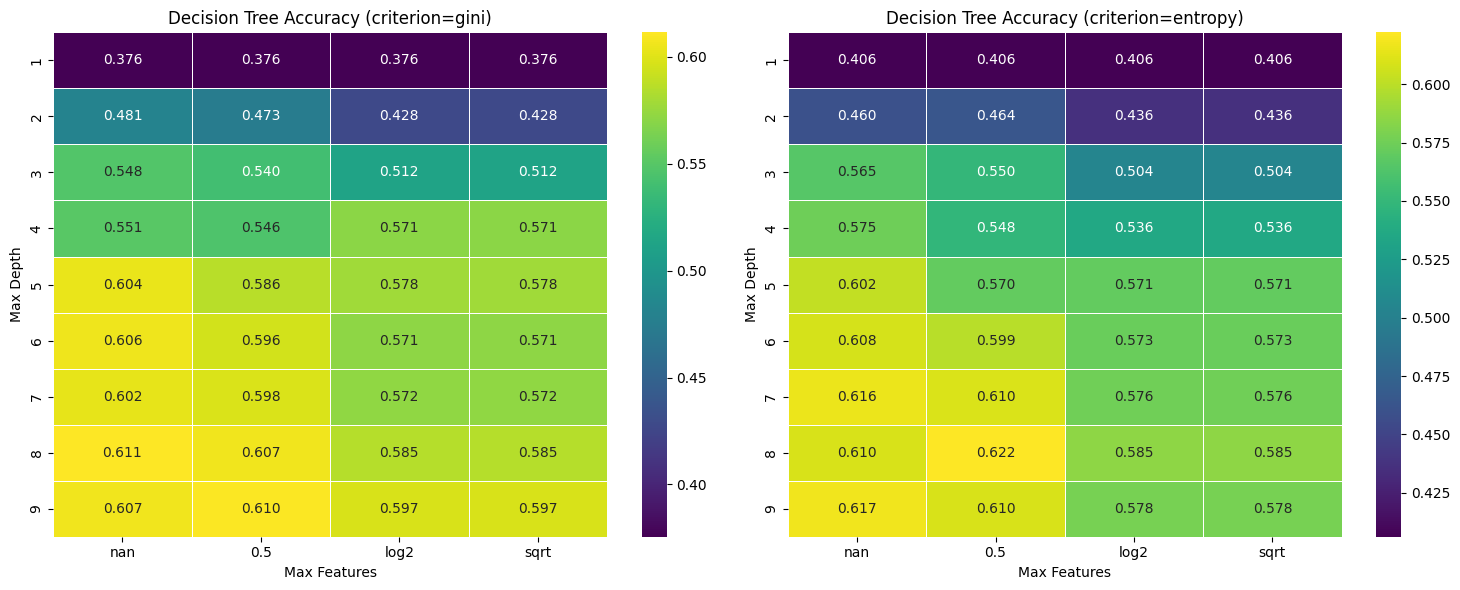

In [13]:
# Convert dictionaries to DataFrames
accuracy_df_gini = pd.DataFrame(accuracy_dict_gini.items(), columns=['Max Depth, Max Features', 'Accuracy'])
accuracy_df_entropy = pd.DataFrame(accuracy_dict_entropy.items(), columns=['Max Depth, Max Features', 'Accuracy'])

# Extract 'Max Depth' and 'Max Features' from the tuples
accuracy_df_gini[['Max Depth', 'Max Features']] = pd.DataFrame(accuracy_df_gini['Max Depth, Max Features'].tolist(), index=accuracy_df_gini.index)
accuracy_df_entropy[['Max Depth', 'Max Features']] = pd.DataFrame(accuracy_df_entropy['Max Depth, Max Features'].tolist(), index=accuracy_df_entropy.index)

# Plot heatmaps
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
heatmap_data_gini = accuracy_df_gini.pivot(index='Max Depth', columns='Max Features', values='Accuracy')
sns.heatmap(heatmap_data_gini, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Decision Tree Accuracy (criterion=gini)')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')

plt.subplot(1, 2, 2)
heatmap_data_entropy = accuracy_df_entropy.pivot(index='Max Depth', columns='Max Features', values='Accuracy')
sns.heatmap(heatmap_data_entropy, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Decision Tree Accuracy (criterion=entropy)')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')

plt.tight_layout()
plt.show()

In [14]:
# Iterate over max depths and max features for friedman_mse criterion
for max_depth in max_depths:
    for max_features in max_features_list:
        dt_regressor_friedman_mse = DecisionTreeRegressor(criterion='friedman_mse', max_depth=max_depth, max_features=max_features, random_state=42)
        dt_regressor_friedman_mse.fit(X_train_reg, y_train_reg)
        y_pred_friedman_mse = dt_regressor_friedman_mse.predict(X_test_reg)
        mse_friedman_mse = mean_squared_error(y_test_reg, y_pred_friedman_mse)
        mse_dict_friedman_mse[(max_depth, max_features)] = mse_friedman_mse


In [15]:
# Iterate over max depths and max features for poisson criterion
for max_depth in max_depths:
    for max_features in max_features_list:
        dt_regressor_poisson = DecisionTreeRegressor(criterion='poisson', max_depth=max_depth, max_features=max_features, random_state=42)
        dt_regressor_poisson.fit(X_train_reg, y_train_reg)
        y_pred_poisson = dt_regressor_poisson.predict(X_test_reg)
        mse_poisson = mean_squared_error(y_test_reg, y_pred_poisson)
        mse_dict_poisson[(max_depth, max_features)] = mse_poisson

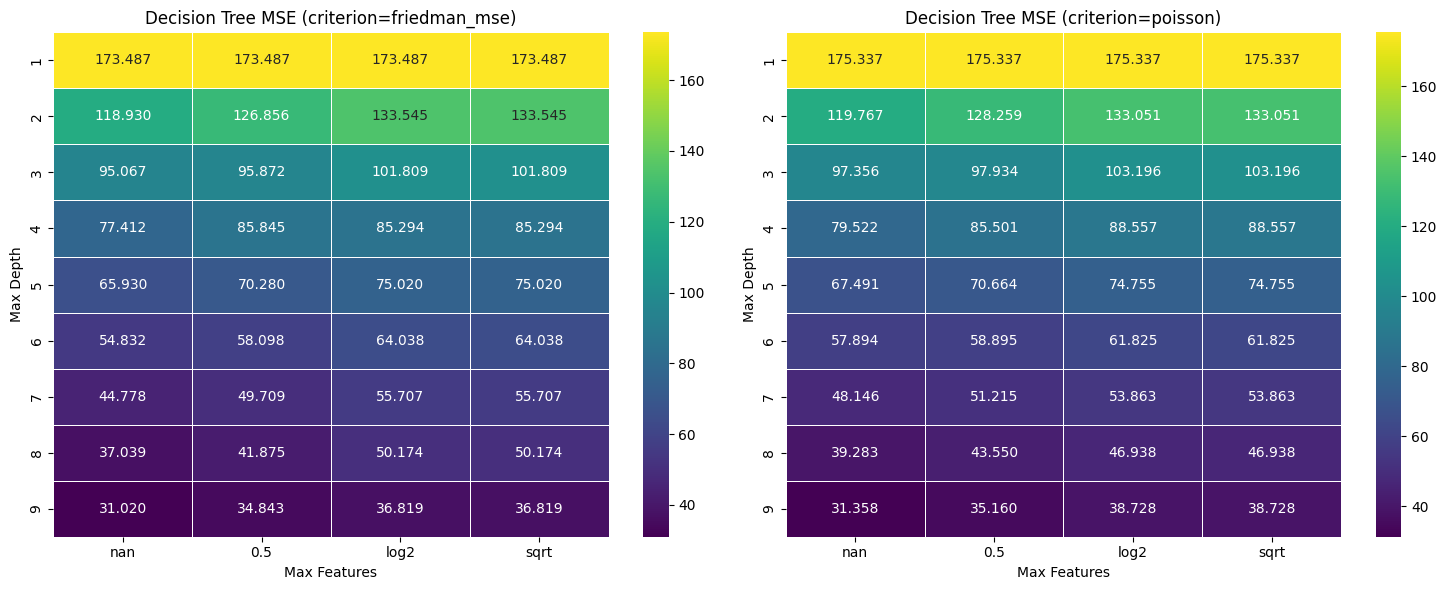

In [16]:
# Convert the MSE dictionaries to DataFrames
mse_df_friedman_mse = pd.DataFrame(list(mse_dict_friedman_mse.items()), columns=['Max Depth, Max Features', 'MSE'])
mse_df_poisson = pd.DataFrame(list(mse_dict_poisson.items()), columns=['Max Depth, Max Features', 'MSE'])

# Extract 'Max Depth' and 'Max Features' from the tuples
mse_df_friedman_mse[['Max Depth', 'Max Features']] = pd.DataFrame(mse_df_friedman_mse['Max Depth, Max Features'].tolist(), index=mse_df_friedman_mse.index)
mse_df_poisson[['Max Depth', 'Max Features']] = pd.DataFrame(mse_df_poisson['Max Depth, Max Features'].tolist(), index=mse_df_poisson.index)

# Plot heatmaps
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
heatmap_data_friedman_mse = mse_df_friedman_mse.pivot(index='Max Depth', columns='Max Features', values='MSE')
sns.heatmap(heatmap_data_friedman_mse, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Decision Tree MSE (criterion=friedman_mse)')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')

plt.subplot(1, 2, 2)
heatmap_data_poisson = mse_df_poisson.pivot(index='Max Depth', columns='Max Features', values='MSE')
sns.heatmap(heatmap_data_poisson, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Decision Tree MSE (criterion=poisson)')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')

plt.tight_layout()
plt.show()

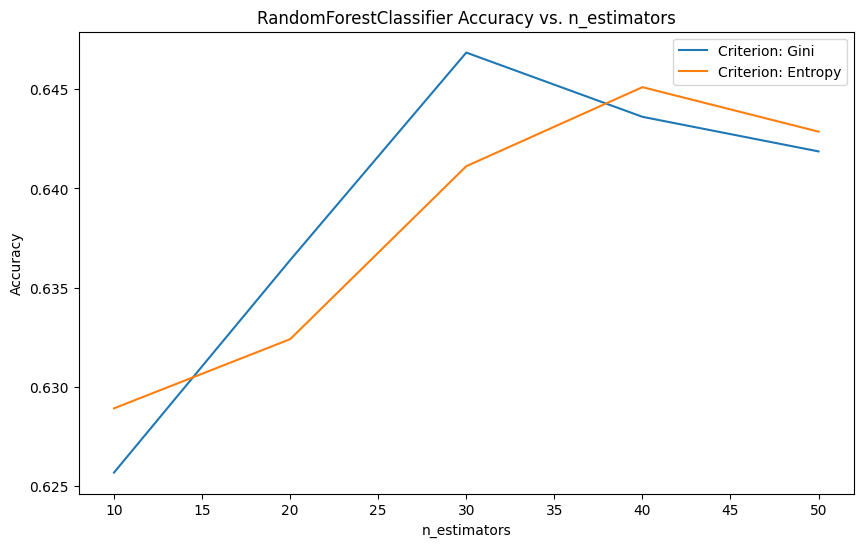

In [17]:
# Define n_estimators values
n_estimators_values = [10, 20, 30, 40, 50]

# Initialize lists to store accuracy values for gini and entropy criteria
accuracy_gini = []
accuracy_entropy = []

# Iterate over n_estimators values
for n_estimators in n_estimators_values:
    # RandomForestClassifier with criterion=gini
    rf_classifier_gini = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', random_state=42)
    rf_classifier_gini.fit(X_train_cls, y_train_cls)
    y_pred_gini = rf_classifier_gini.predict(X_test_cls)
    accuracy_gini.append(accuracy_score(y_test_cls, y_pred_gini))

    # RandomForestClassifier with criterion=entropy
    rf_classifier_entropy = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', random_state=42)
    rf_classifier_entropy.fit(X_train_cls, y_train_cls)
    y_pred_entropy = rf_classifier_entropy.predict(X_test_cls)
    accuracy_entropy.append(accuracy_score(y_test_cls, y_pred_entropy))

# Plot line plot for RandomForestClassifier
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_gini, label='Criterion: Gini')
plt.plot(n_estimators_values, accuracy_entropy, label='Criterion: Entropy')
plt.title('RandomForestClassifier Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Define n_estimators values
# n_estimators_values = [5, 10, 15, 20]
n_estimators_values = [1,2]

# Initialize lists to store MSE values for different criteria
mse_squared_error = []
mse_absolute_error = []
mse_poisson = []

# Iterate over n_estimators values
for n_estimators in n_estimators_values:
    # RandomForestRegressor with criterion='mse'
    rf_regressor_mse = RandomForestRegressor(n_estimators=n_estimators, criterion='squared_error', random_state=42)
    rf_regressor_mse.fit(X_train_reg, y_train_reg)
    y_pred_mse = rf_regressor_mse.predict(X_test_reg)
    mse_squared_error.append(mean_squared_error(y_test_reg, y_pred_mse))

    # RandomForestRegressor with criterion='mae'
    rf_regressor_mae = RandomForestRegressor(n_estimators=n_estimators, criterion='absolute_error', random_state=42)
    rf_regressor_mae.fit(X_train_reg, y_train_reg)
    y_pred_mae = rf_regressor_mae.predict(X_test_reg)
    mse_absolute_error.append(mean_squared_error(y_test_reg, y_pred_mae))

    # RandomForestRegressor with criterion='poisson'
    rf_regressor_poisson = RandomForestRegressor(n_estimators=n_estimators, criterion='poisson', random_state=42)
    rf_regressor_poisson.fit(X_train_reg, y_train_reg)
    y_pred_poisson = rf_regressor_poisson.predict(X_test_reg)
    mse_poisson.append(mean_squared_error(y_test_reg, y_pred_poisson))

# Plot line plot for RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mse_squared_error, label='Criterion: Squared Error')
plt.plot(n_estimators_values, mse_absolute_error, label='Criterion: Absolute Error')
plt.plot(n_estimators_values, mse_poisson, label='Criterion: Poisson')
plt.title('RandomForestRegressor MSE vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()
plt.show()

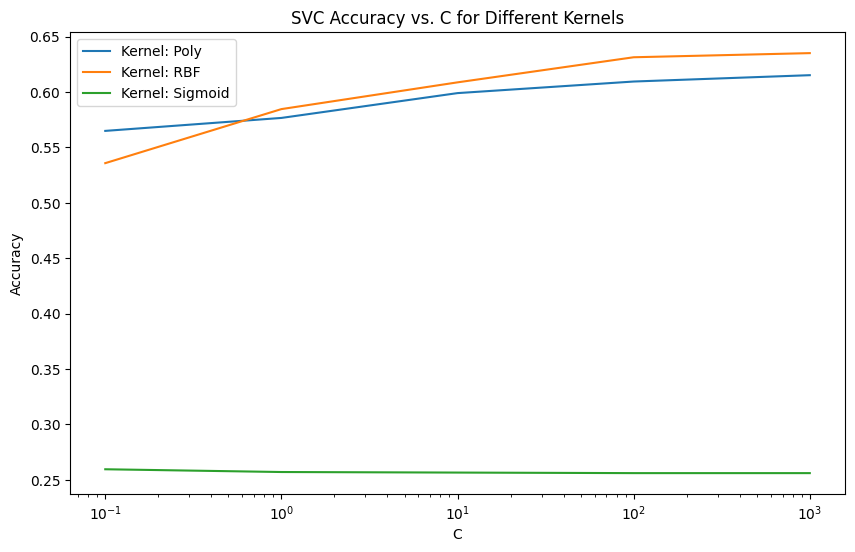

In [18]:
# Define C values
C_values = [0.1, 1, 10, 100, 1000]

# Initialize lists to store accuracy values for different kernel types
accuracy_poly = []
accuracy_rbf = []
accuracy_sigmoid = []

# Iterate over C values
for C_value in C_values:
    # SVC with kernel='poly'
    svc_poly = SVC(kernel='poly', C=C_value, random_state=42)
    svc_poly.fit(X_train_cls, y_train_cls)
    y_pred_poly = svc_poly.predict(X_test_cls)
    accuracy_poly.append(accuracy_score(y_test_cls, y_pred_poly))

    # SVC with kernel='rbf'
    svc_rbf = SVC(kernel='rbf', C=C_value, random_state=42)
    svc_rbf.fit(X_train_cls, y_train_cls)
    y_pred_rbf = svc_rbf.predict(X_test_cls)
    accuracy_rbf.append(accuracy_score(y_test_cls, y_pred_rbf))

    # SVC with kernel='sigmoid'
    svc_sigmoid = SVC(kernel='sigmoid', C=C_value, random_state=42)
    svc_sigmoid.fit(X_train_cls, y_train_cls)
    y_pred_sigmoid = svc_sigmoid.predict(X_test_cls)
    accuracy_sigmoid.append(accuracy_score(y_test_cls, y_pred_sigmoid))

# Plot line plot for Support Vector Classifier
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_poly, label='Kernel: Poly')
plt.plot(C_values, accuracy_rbf, label='Kernel: RBF')
plt.plot(C_values, accuracy_sigmoid, label='Kernel: Sigmoid')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.title('SVC Accuracy vs. C for Different Kernels')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Initialize lists to store MSE values for different kernel types
mse_poly = []
mse_rbf = []
mse_sigmoid = []

# Iterate over C values
for C_value in C_values:
    # SVR with kernel='poly'
    svr_poly = SVR(kernel='poly', C=C_value)
    svr_poly.fit(X_train_reg, y_train_reg)
    y_pred_poly = svr_poly.predict(X_test_reg)
    mse_poly.append(mean_squared_error(y_test_reg, y_pred_poly))

    # SVR with kernel='rbf'
    svr_rbf = SVR(kernel='rbf', C=C_value)
    svr_rbf.fit(X_train_reg, y_train_reg)
    y_pred_rbf = svr_rbf.predict(X_test_reg)
    mse_rbf.append(mean_squared_error(y_test_reg, y_pred_rbf))

    # SVR with kernel='sigmoid'
    svr_sigmoid = SVR(kernel='sigmoid', C=C_value)
    svr_sigmoid.fit(X_train_reg, y_train_reg)
    y_pred_sigmoid = svr_sigmoid.predict(X_test_reg)
    mse_sigmoid.append(mean_squared_error(y_test_reg, y_pred_sigmoid))

# Plot line plot for Support Vector Regressor
plt.figure(figsize=(10, 6))
plt.plot(C_values, mse_poly, label='Kernel: Poly')
plt.plot(C_values, mse_rbf, label='Kernel: RBF')
plt.plot(C_values, mse_sigmoid, label='Kernel: Sigmoid')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.title('SVR MSE vs. C for Different Kernels')
plt.xlabel('C')
plt.ylabel('MSE')
plt.legend()
plt.show()

Hyperparameter tuning involves selecting the optimal values for parameters that are not learned by the model during training. In this task, we explored hyperparameter tuning across various machine learning models.

For classification tasks, we utilized hyperparameters such as the number of neighbors in KNN and the maximum depth and features in Decision Trees. We also investigated different splitting criteria (Gini impurity and entropy) to assess their impact on model accuracy.

In regression tasks, we examined hyperparameters like the number of estimators in Random Forest Regressors. We also explored different splitting criteria (MSE, MAE, and Poisson) to evaluate their effect on mean squared error.

By analyzing these hyperparameters and their effects on model performance, we gained insights into optimizing machine learning models for classification and regression tasks, thereby improving their predictive accuracy and generalization capabilities.